In [1]:
# https://twitter.com/aigonewrong/status/1335377716728586244

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
symbol = 'BTC-USD'
tick = yf.Ticker(symbol)
history = tick.history(period="max")

In [4]:

df=pd.DataFrame()
df['price'] = history.Close
df['volume'] = history.Volume
df['pct_chg'] = df.price.pct_change()
# log return computation
df['log_ret'] = np.log(df.price) - np.log(df.price.shift(1))
df['ret_mean'] = df.log_ret.rolling(21).mean()
# https://en.wikipedia.org/wiki/Volatility_(finance) "annualized vol" but looking back only 21 days
df['hist_volatility'] = df.log_ret.rolling(21).std()*np.sqrt(252)*100
df['vol_chg'] = df.hist_volatility.pct_change()
df = df.dropna()

In [5]:
the_vol_mean = df.hist_volatility.mean()
the_vol_std = df.hist_volatility.std()
print(f'mean of hist_volatility {the_vol_mean:1.5f}')
the_ret_mean = df.ret_mean.mean()
the_ret_std = df.ret_mean.std()
print(f'mean of rolling mean {the_ret_mean:1.5f}')

mean of hist_volatility 53.87154
mean of rolling mean 0.00172


Text(0, 0.5, 'rolling mean of daily price return')

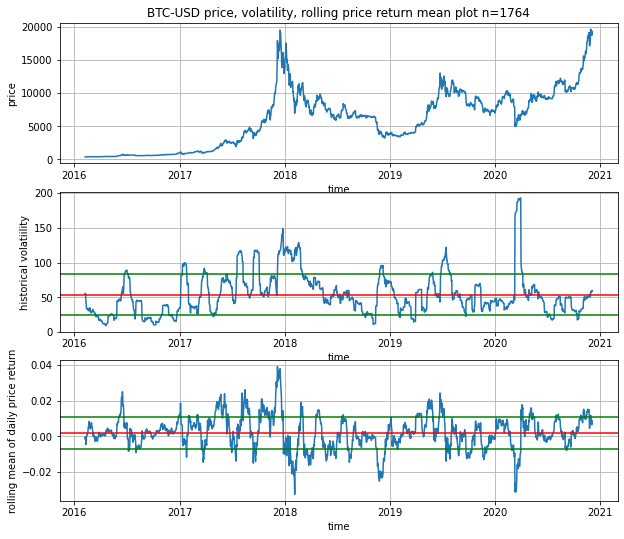

In [6]:
ind = -252*7
plt.figure(0,figsize=(10,15))
'''
plt.subplot(511)
plt.yscale('log')
plt.plot(df.iloc[ind:].volume)
plt.xlabel('time')
plt.ylabel('volume')
plt.grid(True)
'''

plt.subplot(512)
plt.plot(df.iloc[ind:].price)
plt.title(f'{symbol} price, volatility, rolling price return mean plot n={np.abs(ind)}')
plt.xlabel('time')
plt.ylabel('price')
plt.grid(True)

plt.subplot(513)
plt.plot(df.iloc[ind:].hist_volatility)
plt.axhline(the_vol_mean,color='red')
plt.axhline(the_vol_mean-the_vol_std,color='green')
plt.axhline(the_vol_mean+the_vol_std,color='green')
plt.xlabel('time')
plt.ylabel('historical volatiility')
plt.grid(True)

plt.subplot(514)
plt.plot(df.iloc[ind:].ret_mean)
plt.axhline(the_ret_mean,color='red')
plt.axhline(the_ret_mean-the_ret_std,color='green')
plt.axhline(the_ret_mean+the_ret_std,color='green')
plt.grid(True)
plt.xlabel('time')
plt.ylabel('rolling mean of daily price return')


Text(0, 0.5, 'historical volatility')

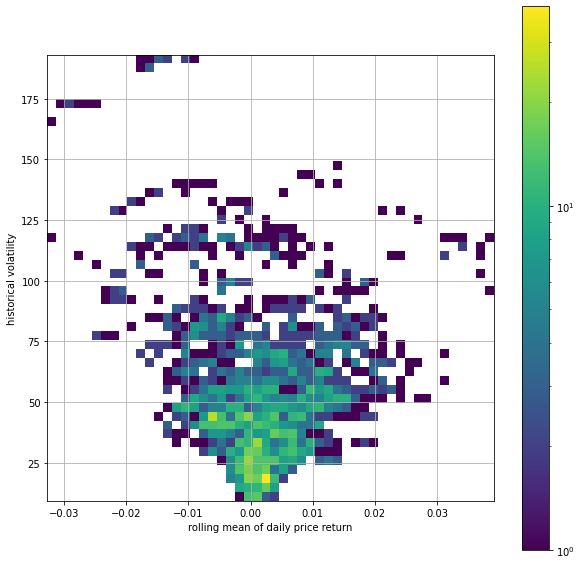

In [7]:
# https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set
from matplotlib.colors import LogNorm
heatmap, xedges, yedges = np.histogram2d(df.ret_mean,df.hist_volatility, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
aspect = (xedges[-1]-xedges[0])/(yedges[-1]-yedges[0])
plt.figure(figsize=(10,10))
cmap = 'viridis' #viridis hot
plt.imshow(heatmap.T, extent=extent, origin='lower', aspect=aspect,norm=LogNorm(),cmap=cmap)
plt.grid(True)
plt.colorbar()
plt.xlabel('rolling mean of daily price return')
plt.ylabel('historical volatility')